In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor

In [2]:
loan=r"C:\Users\Dips\Desktop\Data Science work\Loan dataset\train_loan.csv"
df=pd.read_csv(loan, index_col='Loan_ID')
le = LabelEncoder()
df=df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [3]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,251.488599,77.724756,85.785016,5.755700,0.936482,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,143.779895,92.037074,67.878521,1.370485,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,126.250000,0.000000,27.000000,6.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,249.000000,32.500000,66.500000,6.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,375.750000,151.750000,154.000000,6.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,504.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int32
 6   CoapplicantIncome  614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   Loan_Amount_Term   614 non-null    int32
 9   Credit_History     614 non-null    int32
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(12)
memory usage: 33.6+ KB


<AxesSubplot:>

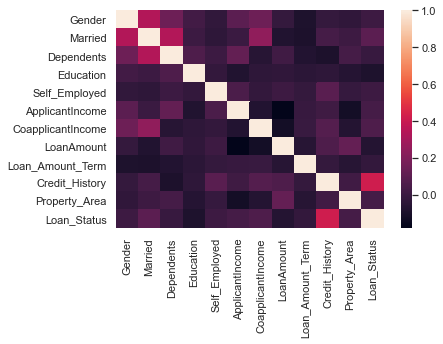

In [5]:
sns.heatmap(df.corr())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

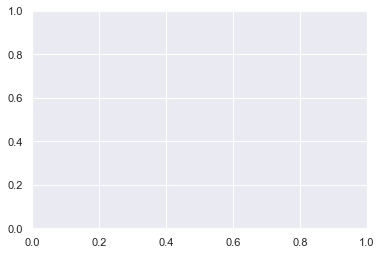

In [27]:
plt.boxplot(df.Loan_Status, df.Credit_History)
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')
plt.show()

In [6]:
X=df.drop(['Loan_Status'],axis=1)

In [7]:
y=df['Loan_Status']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int32
 6   CoapplicantIncome  614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   Loan_Amount_Term   614 non-null    int32
 9   Credit_History     614 non-null    int32
 10  Property_Area      614 non-null    int32
dtypes: int32(11)
memory usage: 31.2+ KB


In [9]:
#split the training data in validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)

In [10]:
xgb=XGBRegressor()
xgb.fit(train_X, train_y, verbose=False)

[14:35:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [11]:
predictions = xgb.predict(val_X)

In [12]:
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error : 0.28219117042494984


In [13]:
xgb=XGBRegressor(n_estimators=300, learning_rate=0.01)
xgb.fit(train_X, train_y, early_stopping_rounds=10, 
             eval_set=[(val_X, val_y)], verbose=False)
predictions = xgb.predict(val_X)

[14:36:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error : 0.30540554455625335


In [15]:
#MSE is actually worse using learning rate and early stopping hyperparameters, use the previous non early stopping and learning method which has a higher accuracy based on MSE and will also be quicker

In [16]:
xgb=XGBRegressor()
xgb.fit(train_X, train_y, verbose=False)

[14:36:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [17]:
testloan=r"C:\Users\Dips\Desktop\Data Science work\Loan dataset\test_loan.csv"
df1=pd.read_csv(testloan, index_col='Loan_ID')
le = LabelEncoder()
df1=df1.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [18]:
test_X=df1

In [19]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             367 non-null    int32
 1   Married            367 non-null    int32
 2   Dependents         367 non-null    int32
 3   Education          367 non-null    int32
 4   Self_Employed      367 non-null    int32
 5   ApplicantIncome    367 non-null    int32
 6   CoapplicantIncome  367 non-null    int32
 7   LoanAmount         367 non-null    int32
 8   Loan_Amount_Term   367 non-null    int32
 9   Credit_History     367 non-null    int32
 10  Property_Area      367 non-null    int32
dtypes: int32(11)
memory usage: 18.6+ KB


In [20]:
test_predictions = xgb.predict(test_X)

In [21]:
df1[['Loan_Status_Predictions']]=test_predictions

In [22]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predictions
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,267,0,10,7,1,2,0.757433
LP001022,1,1,1,0,0,116,25,25,7,1,2,0.801250
LP001031,1,1,2,0,0,245,50,77,7,1,2,0.564778
LP001035,1,1,2,0,0,55,96,0,7,2,2,0.737283
LP001051,1,0,0,1,0,135,0,127,7,1,2,0.591508
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3,1,1,192,48,12,7,1,2,0.839327
LP002975,1,1,0,0,0,201,182,14,7,1,2,0.730610
LP002980,1,0,0,0,0,132,59,25,7,2,1,0.775612


In [ ]:
# whether or not the Loan Status would be accepted has been included in the Loan_Status_Predictions col as a probability, this would need to be further analysed based on the business and use case of the data in order to set a threshold for wheter a loan status predictions should be a yes or a no.